In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/Mall_Customers.csv')

In [4]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = data.iloc[:,[3,4]].values

In [9]:
#using the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,
                     init='k-means++',
                     n_init=10,
                     max_iter=300,
                     tol=1e-4,
                     verbose=0,
                     random_state=None,
                     copy_x=True,
                     algorithm='auto')
    k_means.fit(X)
    wcss.append(k_means.inertia_)

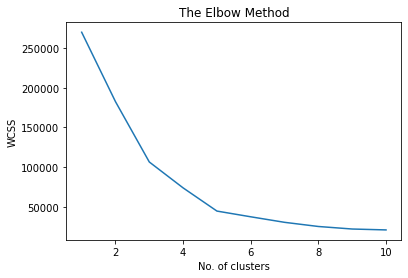

In [10]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
#building the clustering algorithm
k_means = KMeans(n_clusters=5,
                     init='k-means++',
                     n_init=10,
                     max_iter=300,
                     tol=1e-4,
                     verbose=0,
                     random_state=None,
                     copy_x=True,
                     algorithm='auto')

K_clusters = k_means.fit_predict(X)

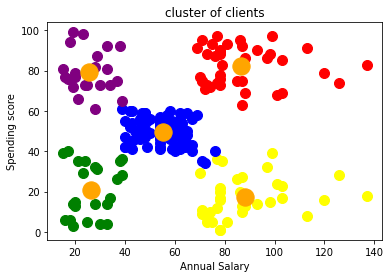

In [13]:
#visualizing the results
plt.scatter(X[K_clusters == 0 ,0],X[K_clusters == 0 , 1] , s = 100 , c = 'red' , label = 'careful')
plt.scatter(X[K_clusters == 1 ,0],X[K_clusters == 1 , 1] , s = 100 , c = 'green' , label = 'Standard')
plt.scatter(X[K_clusters == 2 ,0],X[K_clusters == 2 , 1] , s = 100 , c = 'yellow' , label = 'Target')
plt.scatter(X[K_clusters == 3 ,0],X[K_clusters == 3 , 1] , s = 100 , c = 'blue' , label = 'sensible')
plt.scatter(X[K_clusters == 4 ,0],X[K_clusters == 4 , 1] , s = 100 , c = 'purple' , label = 'careless')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1] , s = 300 , c = 'orange' , label = 'centroids')
plt.title('cluster of clients')
plt.xlabel('Annual Salary')
plt.ylabel('Spending score')
plt.show()